<a href="https://colab.research.google.com/github/bayzhan1/img_processing/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

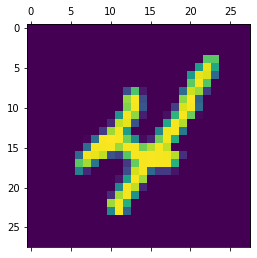

In [9]:
plt.matshow(X_train[9])


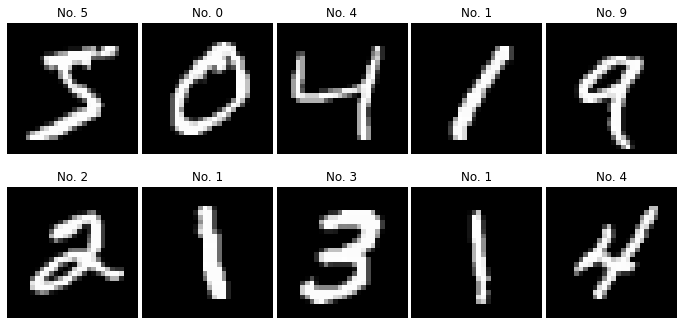

In [13]:
rows=2
cols=5
f, ax = plt.subplots(rows,cols, figsize=(12,6), gridspec_kw={'wspace':0.03, 'hspace':0.01}, squeeze=True)

for r in range(rows):
  for c in range(cols):
    image_index = r*5 + c
    ax[r, c].axis("off")
    ax[r, c].imshow(X_train[image_index], cmap='gray')
    ax[r, c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()



In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train.shape

(60000, 28, 28)

**Flattening the data**

In [17]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flat.shape

(60000, 784)

# Building Models
Very simple neural network with no hidden layers

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')     # The input shape is 784. 
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4964 - accuracy: 0.8739
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3065 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2748 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9267


In [29]:
model.evaluate(X_test_flat, y_test)
#accuracy is 92.59%

313/313 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9259


[0.2649385333061218, 0.9258999824523926]

In [32]:
y_predicted = model.predict(X_test_flat)
y_predicted[0]

array([1.3219872e-05, 8.9558652e-11, 4.2646767e-05, 1.2278169e-02,
       9.6847077e-07, 6.6625536e-05, 1.3596813e-09, 7.2165763e-01,
       7.9855316e-05, 9.3474984e-04], dtype=float32)

In [33]:
np.argmax(y_predicted[0])

7

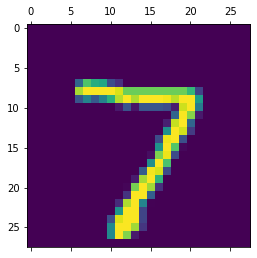

In [34]:
plt.matshow(X_test[0])

### **Building Neural Network Model Using hidden layer**

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(X_train_flat, y_train, batch_size= 128,epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0421 - accuracy: 0.9867
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9943
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0132 - accuracy: 0.9961

In [43]:
model.evaluate(X_test_flat,y_test)
#accuracy is 97.66%

313/313 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9766


[0.0924665629863739, 0.9765999913215637]

In [45]:
y_predicted = model.predict(X_test_flat)
y_predicted[10]

array([9.5411158e-01, 6.7701711e-09, 6.3872733e-07, 6.2078905e-11,
       6.4713737e-14, 3.9901407e-09, 6.1627883e-11, 2.3620949e-07,
       2.9199884e-10, 3.2281852e-07], dtype=float32)

In [47]:
np.argmax(y_predicted[10])

0

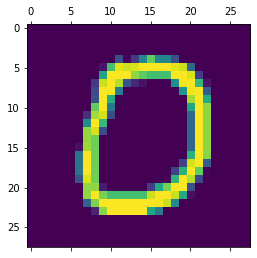

In [48]:
plt.matshow(X_test[10])